1. 데이터 불러오기

In [19]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [20]:
def model_fn(a_layer=None):
    model = keras.Sequential()

    model2 =Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

2. 모델 만들기

In [21]:
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


3. 모델 compile 하기

In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

4. history는 객체에는 훈련 측정 값이 딕셔너리 형태로 들어가 있다.

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


5. 데이터 시각화 하기

[0.5337947607040405, 0.3938748240470886, 0.3575860857963562, 0.3367358148097992, 0.32052668929100037]


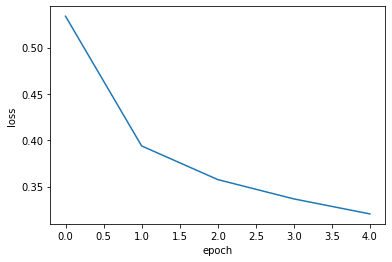

In [24]:
import matplotlib.pyplot as plt
print(history.history['loss'])

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

[0.8131458163261414, 0.8601250052452087, 0.8721874952316284, 0.8800416588783264, 0.8856666684150696]


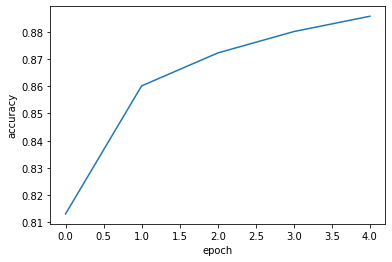

In [25]:
print(history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

[0.3098524212837219, 0.3017074465751648, 0.2932095229625702, 0.28420037031173706, 0.27951568365097046, 0.27260416746139526, 0.26704633235931396, 0.26238009333610535, 0.2598840594291687, 0.2534390985965729, 0.25114238262176514, 0.24216333031654358, 0.24264578521251678, 0.2362377792596817, 0.23453444242477417, 0.22911936044692993, 0.2263341099023819, 0.22459961473941803, 0.22099865972995758, 0.21669763326644897]


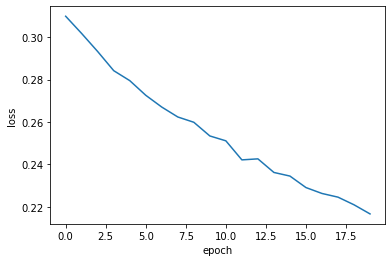

In [26]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

print(history.history['loss'])

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.21565046906471252, 0.21122848987579346, 0.20892877876758575, 0.20862168073654175, 0.20315271615982056, 0.2001296579837799, 0.19985422492027283, 0.19125932455062866, 0.1921585500240326, 0.1875903159379959, 0.18951638042926788, 0.18563620746135712, 0.1868479996919632, 0.1814776211977005, 0.18020901083946228, 0.1763918399810791, 0.17294010519981384, 0.17500187456607819, 0.1720399558544159, 0.16991011798381805]


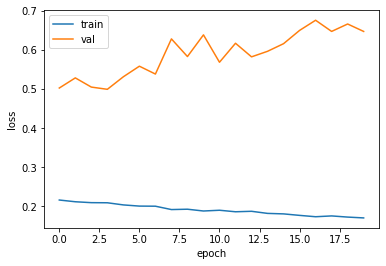

In [27]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


print(history.history.keys())
print(history.history['loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.5860447287559509, 0.43856433033943176, 0.4055442214012146, 0.3801511228084564, 0.36575472354888916, 0.35460445284843445, 0.3426784574985504, 0.332449346780777, 0.3261101245880127, 0.31886976957321167, 0.31151843070983887, 0.3065212070941925, 0.3021854758262634, 0.2952834367752075, 0.28910544514656067, 0.2894451916217804, 0.28450143337249756, 0.28035327792167664, 0.2773880660533905, 0.27128806710243225]


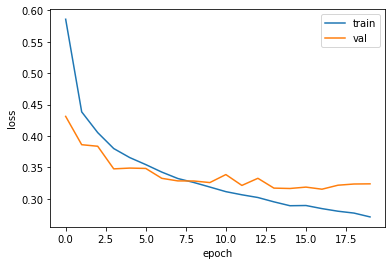

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


print(history.history.keys())
print(history.history['loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
import numpy as np

model.save_weights('model-weight.h5')
model.load_weights('model-weight.h5')


model.save('model-whole.h5')
model = keras.models.load_model('model-whole.h5')

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8828333333333334


In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

model = keras.models.load_model('best-model.h5')

In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
print(early_stopping_cb.stopped_epoch)



3


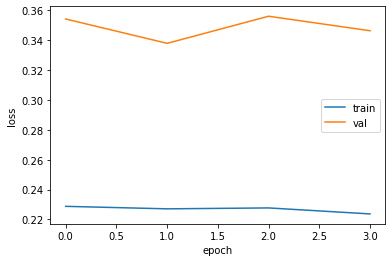

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()